In [3]:
train_full<-read.csv(file='data/train.csv')
train_full

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900


In [4]:
library("FactoMineR")
nums <- unlist(lapply(train_full, is.numeric)) # renvoie les colonnes de features numériques
var.pca<-PCA(train_full[,nums]) # calcule le PCA
library("factoextra")

Warning message in PCA(train_full[, nums]):
“Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package”Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


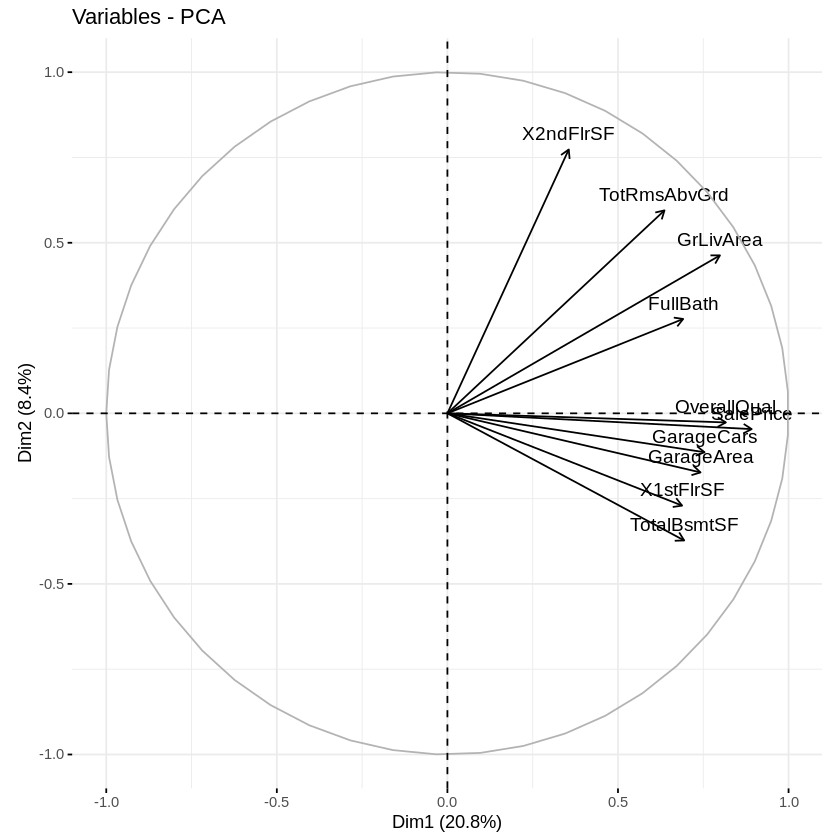

In [5]:
fviz_pca_var(var.pca, col.var = "black", select.var = list(contrib=10)) # affiche le PCA

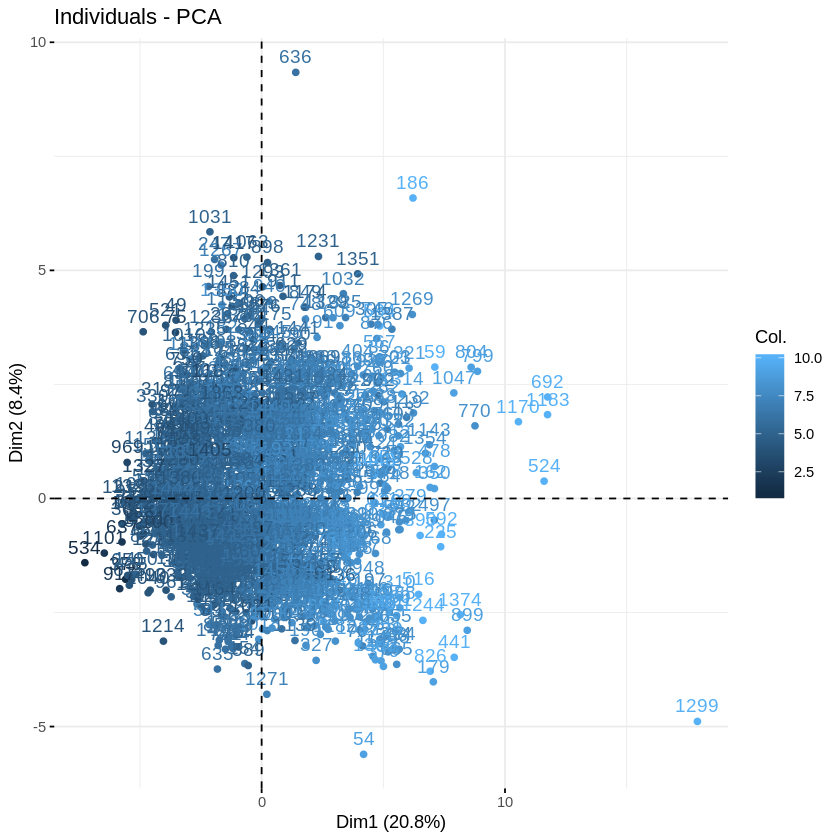

In [6]:
fviz_pca_ind (var.pca, col.ind=train_full$OverallQual)

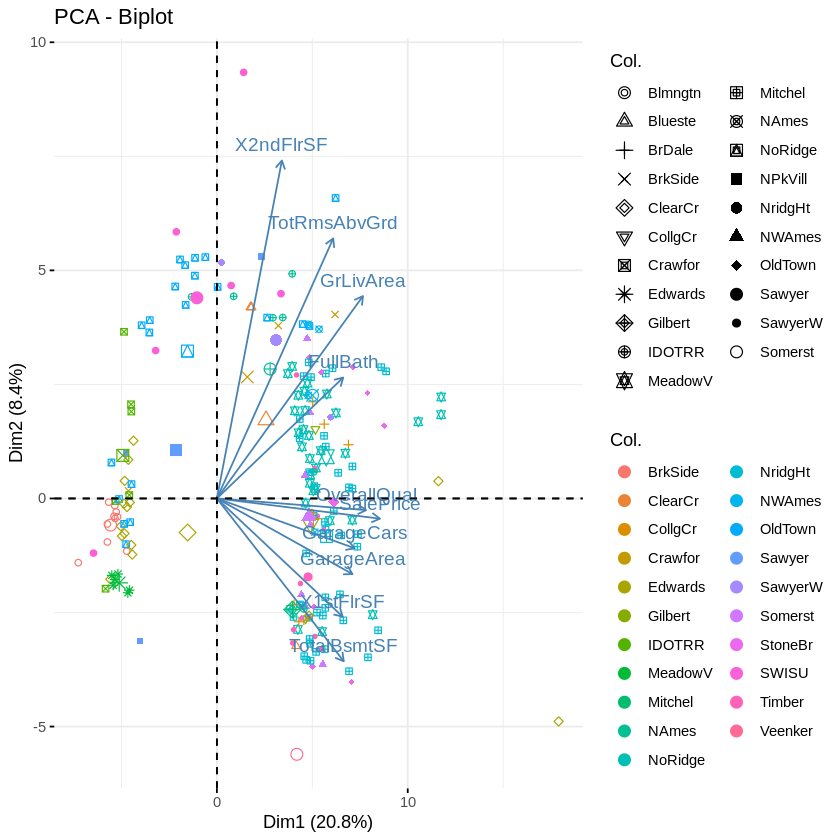

In [7]:
fviz_pca_biplot (var.pca, col.ind=train_full$Neighborhood, select.var = list(contrib=10), select.ind = list(contrib=200), label="var")

# select.var : limite les vecteurs au plus grand
# select.ind : limite le nbre de points aux plus importants

corrplot 0.84 loaded


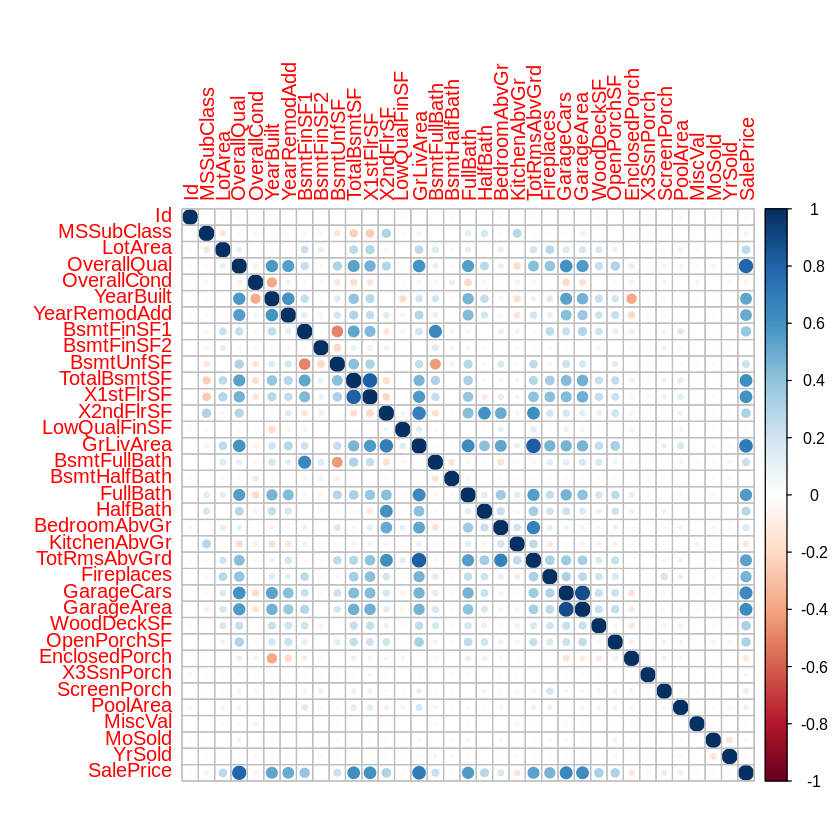

In [8]:
library("corrplot")
train_full_nums <- train_full[,nums]
matcor <- cor(train_full_nums[,c(-3,-9,-26)])
corrplot(matcor) # affiche la matrice de corrélation

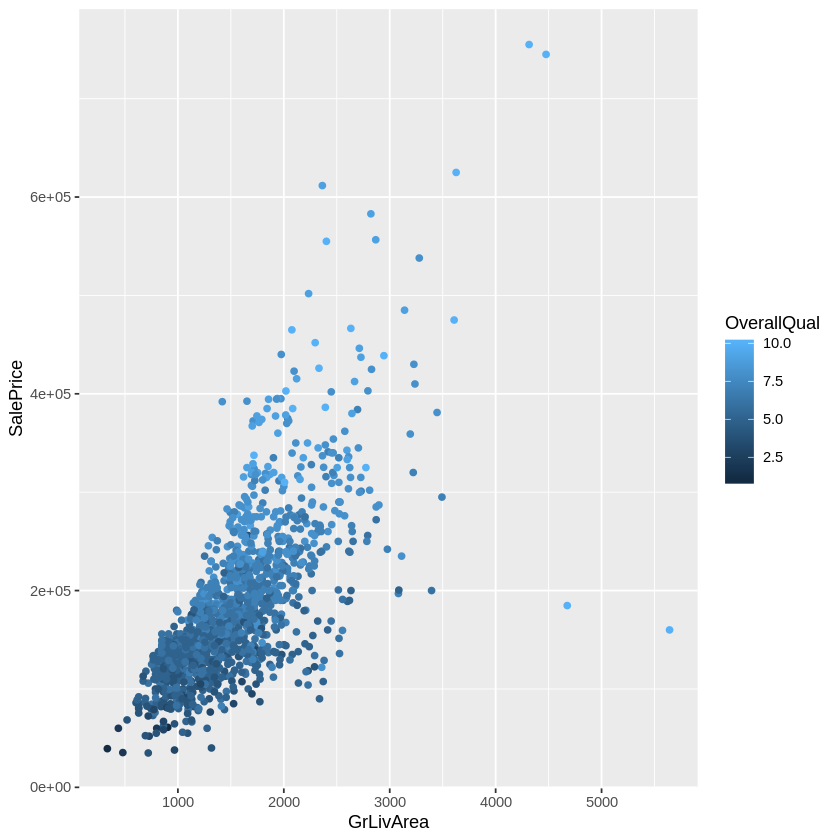

In [9]:
qplot(GrLivArea, SalePrice, data=train_full, xlab="GrLivArea", ylab="SalePrice", col=OverallQual)

In [10]:
mat<-matcor['SalePrice',]
sorted_mat<-sort(mat, decreasing = TRUE)
sorted_mat<-head(sorted_mat, 11)
sorted_mat

SalePrice  OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF 
   1.0000000    0.7909816    0.7086245    0.6404092    0.6234314    0.6135806 
   X1stFlrSF     FullBath TotRmsAbvGrd    YearBuilt YearRemodAdd 
   0.6058522    0.5606638    0.5337232    0.5228973    0.5071010

In [29]:
names(sorted_mat)[-1]

[1] "OverallQual"  "GrLivArea"    "GarageCars"   "GarageArea"   "TotalBsmtSF" 
 [6] "X1stFlrSF"    "FullBath"     "TotRmsAbvGrd" "YearBuilt"    "YearRemodAdd"

In [53]:
selected_features<-subset(train_full, select=c(names(sorted_mat)))

In [54]:
reg.multiple <-lm(SalePrice~., data = selected_features)
summary(reg.multiple)


Call:
lm(formula = SalePrice ~ ., data = selected_features)

Residuals:
    Min      1Q  Median      3Q     Max 
-489958  -19316   -1948   16020  290558 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.186e+06  1.291e+05  -9.187  < 2e-16 ***
OverallQual   1.960e+04  1.190e+03  16.472  < 2e-16 ***
GrLivArea     5.130e+01  4.233e+00  12.119  < 2e-16 ***
GarageCars    1.042e+04  3.044e+03   3.422 0.000639 ***
GarageArea    1.495e+01  1.031e+01   1.450 0.147384    
TotalBsmtSF   1.986e+01  4.295e+00   4.625 4.09e-06 ***
X1stFlrSF     1.417e+01  4.930e+00   2.875 0.004097 ** 
FullBath     -6.791e+03  2.682e+03  -2.532 0.011457 *  
TotRmsAbvGrd  3.310e+01  1.119e+03   0.030 0.976404    
YearBuilt     2.682e+02  5.035e+01   5.328 1.15e-07 ***
YearRemodAdd  2.965e+02  6.363e+01   4.659 3.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37920 on 1449 degrees of freedom
Multiple R-squared:  0.7737,	Adj

In [55]:
library(car)
vif(reg.multiple) #library car

OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF    X1stFlrSF 
    2.748629     5.018752     5.250959     4.931012     3.602674     3.684726 
    FullBath TotRmsAbvGrd    YearBuilt YearRemodAdd 
    2.215500     3.356517     2.345827     1.751047

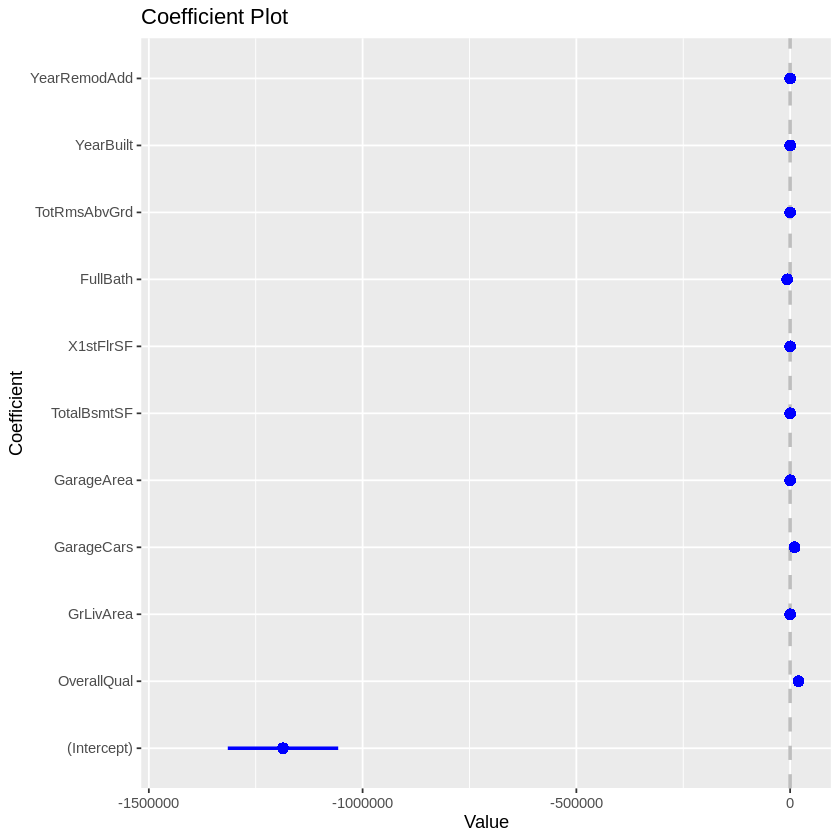

In [56]:
library(coefplot)
coefplot(reg.multiple) #library(coefplot)

In [57]:
reg.multipleOptimale <-step(reg.multiple, direction = "backward")
summary(reg.multipleOptimale)

Start:  AIC=30797.38
SalePrice ~ OverallQual + GrLivArea + GarageCars + GarageArea + 
    TotalBsmtSF + X1stFlrSF + FullBath + TotRmsAbvGrd + YearBuilt + 
    YearRemodAdd

               Df  Sum of Sq        RSS   AIC
- TotRmsAbvGrd  1 1.2586e+06 2.0838e+12 30795
<none>                       2.0838e+12 30797
- GarageArea    1 3.0220e+09 2.0868e+12 30798
- FullBath      1 9.2173e+09 2.0930e+12 30802
- X1stFlrSF     1 1.1888e+10 2.0957e+12 30804
- GarageCars    1 1.6842e+10 2.1007e+12 30807
- TotalBsmtSF   1 3.0758e+10 2.1146e+12 30817
- YearRemodAdd  1 3.1218e+10 2.1150e+12 30817
- YearBuilt     1 4.0823e+10 2.1246e+12 30824
- GrLivArea     1 2.1123e+11 2.2950e+12 30936
- OverallQual   1 3.9021e+11 2.4740e+12 31046

Step:  AIC=30795.39
SalePrice ~ OverallQual + GrLivArea + GarageCars + GarageArea + 
    TotalBsmtSF + X1stFlrSF + FullBath + YearBuilt + YearRemodAdd

               Df  Sum of Sq        RSS   AIC
<none>                       2.0838e+12 30795
- GarageArea    1 3.0281e+09 2


Call:
lm(formula = SalePrice ~ OverallQual + GrLivArea + GarageCars + 
    GarageArea + TotalBsmtSF + X1stFlrSF + FullBath + YearBuilt + 
    YearRemodAdd, data = selected_features)

Residuals:
    Min      1Q  Median      3Q     Max 
-490056  -19317   -1948   16028  290442 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.186e+06  1.283e+05  -9.241  < 2e-16 ***
OverallQual   1.960e+04  1.188e+03  16.505  < 2e-16 ***
GrLivArea     5.138e+01  3.107e+00  16.536  < 2e-16 ***
GarageCars    1.043e+04  3.033e+03   3.438 0.000603 ***
GarageArea    1.493e+01  1.028e+01   1.452 0.146838    
TotalBsmtSF   1.986e+01  4.283e+00   4.636 3.87e-06 ***
X1stFlrSF     1.417e+01  4.928e+00   2.876 0.004083 ** 
FullBath     -6.780e+03  2.658e+03  -2.551 0.010832 *  
YearBuilt     2.681e+02  5.016e+01   5.345 1.05e-07 ***
YearRemodAdd  2.964e+02  6.360e+01   4.661 3.43e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

In [58]:
selected_features2<-subset(selected_features, select=-c(GarageArea))
reg.multiple2 <-lm(SalePrice~., data = selected_features2)
summary(reg.multiple2)


Call:
lm(formula = SalePrice ~ ., data = selected_features2)

Residuals:
    Min      1Q  Median      3Q     Max 
-482787  -19144   -1773   16256  289362 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.187e+06  1.292e+05  -9.190  < 2e-16 ***
OverallQual   1.958e+04  1.191e+03  16.448  < 2e-16 ***
GrLivArea     5.197e+01  4.209e+00  12.348  < 2e-16 ***
GarageCars    1.396e+04  1.819e+03   7.672 3.09e-14 ***
TotalBsmtSF   2.036e+01  4.283e+00   4.753 2.20e-06 ***
X1stFlrSF     1.465e+01  4.921e+00   2.977  0.00296 ** 
FullBath     -7.157e+03  2.671e+03  -2.679  0.00747 ** 
TotRmsAbvGrd -7.976e+01  1.117e+03  -0.071  0.94307    
YearBuilt     2.696e+02  5.036e+01   5.354 1.00e-07 ***
YearRemodAdd  2.956e+02  6.366e+01   4.644 3.72e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37940 on 1450 degrees of freedom
Multiple R-squared:  0.7734,	Adjusted R-squared:  0.772 
F-statistic: 549.8 on 9 and 14

In [59]:
vif(reg.multiple2)

OverallQual    GrLivArea   GarageCars  TotalBsmtSF    X1stFlrSF     FullBath 
    2.748149     4.958324     1.873688     3.579810     3.668328     2.195866 
TotRmsAbvGrd    YearBuilt YearRemodAdd 
    3.340268     2.345020     1.750901

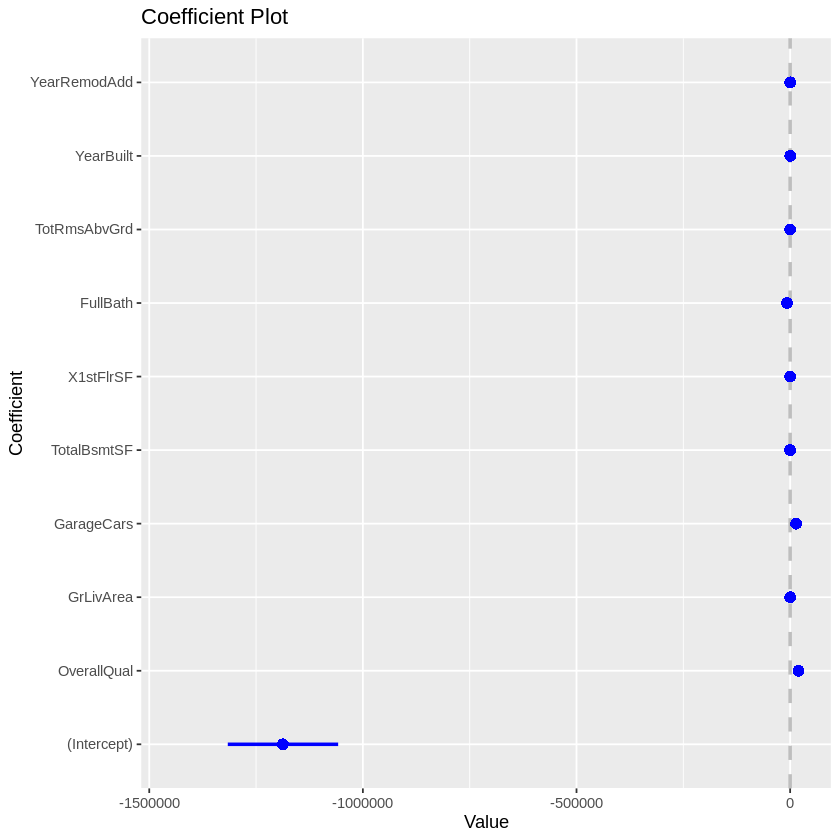

In [60]:
coefplot(reg.multiple2)

In [63]:
reg.multipleOptimale2 <-step(reg.multiple2, direction = "backward")
summary(reg.multipleOptimale2)

Start:  AIC=30797.5
SalePrice ~ OverallQual + GrLivArea + GarageCars + TotalBsmtSF + 
    X1stFlrSF + FullBath + TotRmsAbvGrd + YearBuilt + YearRemodAdd

               Df  Sum of Sq        RSS   AIC
- TotRmsAbvGrd  1 7.3419e+06 2.0868e+12 30796
<none>                       2.0868e+12 30798
- FullBath      1 1.0329e+10 2.0972e+12 30803
- X1stFlrSF     1 1.2758e+10 2.0996e+12 30804
- YearRemodAdd  1 3.1043e+10 2.1179e+12 30817
- TotalBsmtSF   1 3.2520e+10 2.1194e+12 30818
- YearBuilt     1 4.1250e+10 2.1281e+12 30824
- GarageCars    1 8.4713e+10 2.1716e+12 30854
- GrLivArea     1 2.1945e+11 2.3063e+12 30942
- OverallQual   1 3.8937e+11 2.4762e+12 31045

Step:  AIC=30795.51
SalePrice ~ OverallQual + GrLivArea + GarageCars + TotalBsmtSF + 
    X1stFlrSF + FullBath + YearBuilt + YearRemodAdd

               Df  Sum of Sq        RSS   AIC
<none>                       2.0868e+12 30796
- FullBath      1 1.0617e+10 2.0975e+12 30801
- X1stFlrSF     1 1.2759e+10 2.0996e+12 30802
- YearRemodAdd  


Call:
lm(formula = SalePrice ~ OverallQual + GrLivArea + GarageCars + 
    TotalBsmtSF + X1stFlrSF + FullBath + YearBuilt + YearRemodAdd, 
    data = selected_features2)

Residuals:
    Min      1Q  Median      3Q     Max 
-482525  -19191   -1801   16208  289639 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.188e+06  1.284e+05  -9.255  < 2e-16 ***
OverallQual   1.959e+04  1.188e+03  16.486  < 2e-16 ***
GrLivArea     5.177e+01  3.097e+00  16.714  < 2e-16 ***
GarageCars    1.395e+04  1.817e+03   7.680 2.92e-14 ***
TotalBsmtSF   2.039e+01  4.269e+00   4.775 1.98e-06 ***
X1stFlrSF     1.465e+01  4.919e+00   2.979  0.00294 ** 
FullBath     -7.184e+03  2.644e+03  -2.717  0.00666 ** 
YearBuilt     2.699e+02  5.017e+01   5.380 8.69e-08 ***
YearRemodAdd  2.957e+02  6.362e+01   4.649 3.64e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37920 on 1451 degrees of freedom
Multiple R-squared:  0.7734,	Adjus

In [66]:
final_train_features<-subset(selected_features2, select=-c(SalePrice, TotRmsAbvGrd))
final_train_features

OverallQual,GrLivArea,GarageCars,TotalBsmtSF,X1stFlrSF,FullBath,YearBuilt,YearRemodAdd
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
7,1710,2,856,856,2,2003,2003
6,1262,2,1262,1262,2,1976,1976
7,1786,2,920,920,2,2001,2002
7,1717,3,756,961,1,1915,1970
8,2198,3,1145,1145,2,2000,2000
5,1362,2,796,796,1,1993,1995
8,1694,2,1686,1694,2,2004,2005
7,2090,2,1107,1107,2,1973,1973
7,1774,2,952,1022,2,1931,1950


In [69]:
library("FactoMineR")
var2.pca<-PCA(final_train_features)


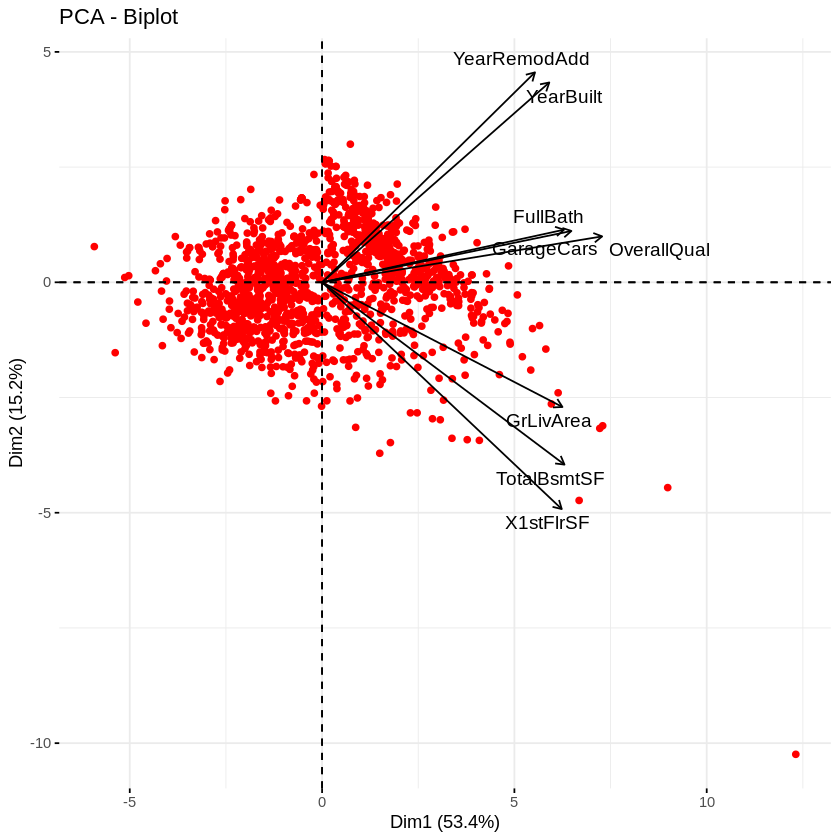

In [74]:
library("factoextra")
fviz_pca_biplot (var2.pca, col.var="black", col.ind="red", label="var", repel=TRUE)

In [78]:
final_train_full<-subset(final_train_features, select=c(OverallQual, YearBuilt, GrLivArea))
final_train_full

OverallQual,YearBuilt,GrLivArea
<int>,<int>,<int>
7,2003,1710
6,1976,1262
7,2001,1786
7,1915,1717
8,2000,2198
5,1993,1362
8,2004,1694
7,1973,2090
7,1931,1774


In [79]:
var3.pca<-PCA(final_train_full)

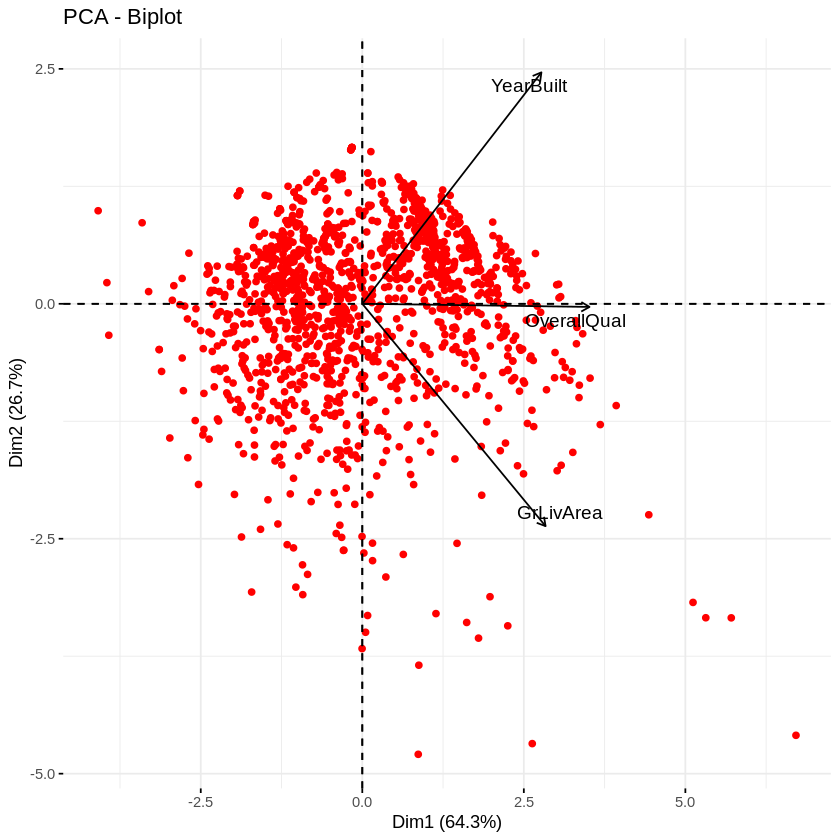

In [80]:
fviz_pca_biplot (var3.pca, col.var="black", col.ind="red", label="var", repel=TRUE)